## Importing

### Import Libraries

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re 
from sklearn import preprocessing
import numpy as np

### Import Data

In [316]:
url = 'https://raw.githubusercontent.com/sami12rom/Titanic/master/train.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Pre-processing

In [317]:
def preprocess(data):
    #Remove un-needed columns
    data=data[data.columns.difference(['Name','Ticket'])]
    #data = data[['PassengerId','Survived','Age','Sex','Fare','Cabin','Embarked','Pclass','Parch','SibSp']]
                                            
    #Replace null Ages with Median
    data['Age'].fillna(data['Age'].median(), inplace=True)
    data=data.dropna(subset=['Embarked'],axis=0)

    #Replace null Fares
    data['Fare'].fillna(data['Fare'].median(), inplace=True)

    #Combine Parents with Siblings to One Column
    data['Family']=data['SibSp']+data['Parch']
    data['Family']= data.apply(lambda x: ['Alone' if x ==0 else ('small fm' if x <=2 else 'big fm')  for x in data['Family']])
    data = pd.concat([data,pd.get_dummies(data['Family'],prefix='f')],axis=1)
    data['Family']=data['SibSp']+data['Parch']
    data.drop(['SibSp','Parch'],axis=1,inplace=True)
    #If he is Alone -- incorporated above
    #data['Alone'] = [0 if x >= 1 else 1 for x in data['Family']]

    #Encode Sex
    data = pd.concat([data,pd.get_dummies(data['Sex'],prefix='Sex')],axis=1)
    #data['Sex'] = data['Sex'].replace(['male','female'],[1,0])
    data = data.drop(['Sex'],axis=1)

    #Cabin Type One Hot Encode
    t=data.Cabin.fillna('U')
    data['Cabin']=t.str.slice(0,1)
    data = pd.concat([data,pd.get_dummies(data['Cabin'],prefix='Cabin')],axis=1)
    data = data.drop(['Cabin'],axis=1)

    #Remove String from Tickets????
    #data['Ticket_Numbers'] = data['Ticket'].str.replace('[^0-9]', '')
    #data.loc[data['Ticket_Numbers']=='','Ticket_Numbers'] = 'NA'

    #One Hot Encode the Pclass (Ticket Class)
    data = pd.concat([data,pd.get_dummies(data['Pclass'],prefix='tktclass')],axis=1)
    #data = data.drop(['Pclass'],axis=1)

    #One Hot Encode the Embark Location
    data['Embarked'] = data['Embarked'].replace(['S','C','Q'],['Southampton','Cherbourg','Queenstown'])
    data=pd.concat([data,pd.get_dummies(data['Embarked'],prefix='Embark')],axis=1)
    data.drop(['Embarked'],axis=1,inplace=True)

    #Set PassengerId as Index
    data=data.set_index('PassengerId')
    return data

In [318]:
data = preprocess(data)
data

,Age,Fare,Pclass,Survived,Family,f_Alone,f_big fm,f_small fm,Sex_female,Sex_male,...,Cabin_F,Cabin_G,Cabin_T,Cabin_U,tktclass_1,tktclass_2,tktclass_3,Embark_Cherbourg,Embark_Queenstown,Embark_Southampton
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,3,0,1,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
2,38.0,71.2833,1,1,1,0,0,1,1,0,...,0,0,0,0,1,0,0,1,0,0
3,26.0,7.9250,3,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,35.0,53.1000,1,1,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
5,35.0,8.0500,3,0,0,1,0,0,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,13.0000,2,0,0,1,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1
888,19.0,30.0000,1,1,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
889,28.0,23.4500,3,0,3,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1


<AxesSubplot:xlabel='Fare'>

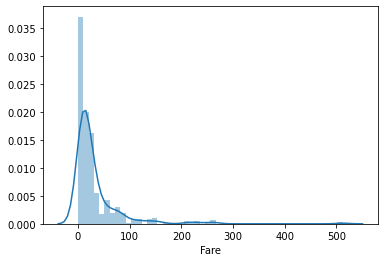

In [290]:
sns.distplot(data['Fare'])
#sns.distplot(data['Age'])

Text(0.5, 1.0, 'Correlations after one-hot encoding')

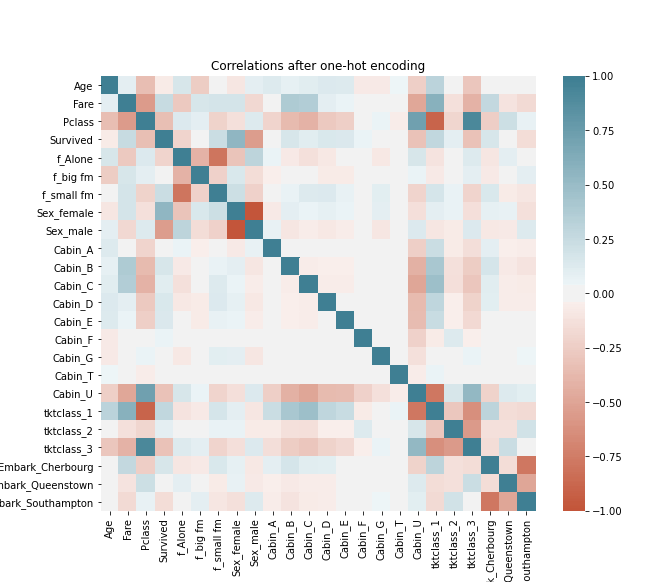

In [291]:
fig = plt.subplots(figsize=(10,8))
corr = data.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1,center=0, 
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)#, annot=True)
plt.title('Correlations after one-hot encoding')

## Feature Normalizing & Engineering

In [292]:
#Features = data.columns.difference(['Survived'])
#x = data[Features]
x = data.loc[:,data.columns != 'Cabin_T']
x = x.loc[:,x.columns != 'Survived']
y=data['Survived'].values
x

,Age,Fare,Pclass,f_Alone,f_big fm,f_small fm,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_E,Cabin_F,Cabin_G,Cabin_U,tktclass_1,tktclass_2,tktclass_3,Embark_Cherbourg,Embark_Queenstown,Embark_Southampton
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,7.2500,3,0,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
2,38.0,71.2833,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,26.0,7.9250,3,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
4,35.0,53.1000,1,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,35.0,8.0500,3,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,27.0,13.0000,2,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,1
888,19.0,30.0000,1,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
889,28.0,23.4500,3,0,1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [293]:
x= preprocessing.StandardScaler().fit(x).transform(x)
x

array([[-0.56367407, -0.50023975,  0.82520863, ..., -0.48271079,
        -0.30794088,  0.61679395],
       [ 0.66921696,  0.78894661, -1.57221121, ...,  2.07163382,
        -0.30794088, -1.62128697],
       [-0.25545131, -0.48664993,  0.82520863, ..., -0.48271079,
        -0.30794088,  0.61679395],
       ...,
       [-0.10133993, -0.17408416,  0.82520863, ..., -0.48271079,
        -0.30794088,  0.61679395],
       [-0.25545131, -0.0422126 , -1.57221121, ...,  2.07163382,
        -0.30794088, -1.62128697],
       [ 0.20688282, -0.49017322,  0.82520863, ..., -0.48271079,
         3.24737656, -1.62128697]])

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [295]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4, stratify=y)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (711, 22) (711,)
Test set: (178, 22) (178,)


## Classification

#### Logistic Regression

In [296]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)
print(LR)
yhatlr = LR.predict(x_test)
print("Prediction: ",yhatlr[0:5])
print("Sample    : ",y_test [0:5])
print("Logistic Regression Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(x_train)))
print("Logistic Regression Test set Accuracy: ", metrics.accuracy_score(y_test, yhatlr))

LogisticRegression(C=0.01, solver='liblinear')
Prediction:  [0 1 1 1 0]
Sample    :  [1 1 1 0 0]
Logistic Regression Train set Accuracy:  0.8129395218002813
Logistic Regression Test set Accuracy:  0.7471910112359551


### Support Vector Machine

param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf'],}#'epsilon': [0.05, 0.1, 0.5, 1, 5, 10, 20]}
grid = GridSearchCV(svm.SVC(),param_grid,refit = True, verbose=0, n_jobs=-1)
grid_result = grid.fit(x_train, y_train)
best_params = grid_result.best_params_
best_params

yhatgsvc=grid.predict(x_test)
print("Prediction: ",yhatgsvc [0:5])
print("Sample    : ",y_test [0:5])
print("SVM Train set Accuracy: ", metrics.accuracy_score(y_train, grid.predict(x_train)))
print("SVM Test set Accuracy: ", metrics.accuracy_score(y_test, yhatgsvc)

In [297]:
clf = svm.SVC(kernel='rbf')
print(clf)
clf.fit(x_train, y_train)
yhatsvm = clf.predict(x_test)
print("Prediction: ",yhatsvm [0:5])
print("Sample    : ",y_test [0:5])
print("SVM Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(x_train)))
print("SVM Test set Accuracy: ", metrics.accuracy_score(y_test, yhatsvm))

SVC()
Prediction:  [0 1 1 0 0]
Sample    :  [1 1 1 0 0]
SVM Train set Accuracy:  0.8593530239099859
SVM Test set Accuracy:  0.7808988764044944


### Decision Tree

In [298]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
print(drugTree)
drugTree.fit(x_train,y_train)
predTree = drugTree.predict(x_test)
print ("Prediction: ",predTree [0:5])
print("Sample    : ",y_test [0:5])
print("Decision Tree Train set Accuracy: ", metrics.accuracy_score(y_train, drugTree.predict(x_train)))
print("Decision Tree Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTreeClassifier(criterion='entropy', max_depth=4)
Prediction:  [0 1 1 0 0]
Sample    :  [1 1 1 0 0]
Decision Tree Train set Accuracy:  0.8452883263009845
Decision Tree Test set Accuracy:  0.7865168539325843


### KNN Nearest Neighbour

The best accuracy was with 0.7584269662921348 with k= 5


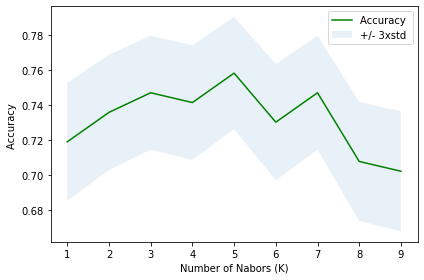

In [299]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhatknn=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhatknn)

    
    std_acc[n-1]=np.std(yhatknn==y_test)/np.sqrt(yhatknn.shape[0])
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [300]:
k=5
nn = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
print(nn)

yhatknn = nn.predict(x_test)
print("Prediction: ",yhatknn[0:5])
print("Sample    : ",y_test [0:5])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, nn.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatknn))

KNeighborsClassifier()
Prediction:  [0 0 1 0 0]
Sample    :  [1 1 1 0 0]
Train set Accuracy:  0.8509142053445851
Test set Accuracy:  0.7584269662921348


### Random Forest

In [301]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 0, criterion='entropy')
# Train the model on training data
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [302]:
# Use the forest's predict method on the test data
yhatrf = rf.predict(x_test)
print("Prediction: ",yhatrf[0:5])
print("Sample    : ",y_test [0:5])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, rf.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatrf))

Prediction:  [1 1 1 0 0]
Sample    :  [1 1 1 0 0]
Train set Accuracy:  0.9845288326300985
Test set Accuracy:  0.7752808988764045


### XGBoost Model

In [303]:
from xgboost import XGBClassifier

In [304]:
xgbc=XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5, random_state=0)
xgbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [305]:
yhatxgb=xgbc.predict(x_test)
print("Prediction: ",yhatxgb[0:5])
print("Sample    : ",y_test [0:5])
print("Train set Accuracy: ", metrics.accuracy_score(y_train, xgbc.predict(x_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhatxgb))

Prediction:  [0 1 1 0 0]
Sample    :  [1 1 1 0 0]
Train set Accuracy:  0.9338959212376934
Test set Accuracy:  0.8033707865168539


## Apply Model on Unseen Dataset

In [306]:
url = 'https://raw.githubusercontent.com/sami12rom/Titanic/master/test.csv'
data = pd.read_csv(url)
data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [307]:
data = preprocess(data)
data

,Age,Fare,Pclass,f_Alone,f_big fm,f_small fm,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Cabin_E,Cabin_F,Cabin_G,Cabin_U,tktclass_1,tktclass_2,tktclass_3,Embark_Cherbourg,Embark_Queenstown,Embark_Southampton
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,34.5,7.8292,3,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
893,47.0,7.0000,3,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
894,62.0,9.6875,2,1,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0
895,27.0,8.6625,3,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
896,22.0,12.2875,3,0,0,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,27.0,8.0500,3,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
1306,39.0,108.9000,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1307,38.5,7.2500,3,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


In [308]:
Features = data.columns
x = data[Features]
x= preprocessing.StandardScaler().fit(x).transform(x)
x

array([[ 0.38623105, -0.49741333,  0.87348191, ..., -0.56814154,
         2.84375747, -1.35067551],
       [ 1.37137004, -0.51227801,  0.87348191, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [ 2.55353683, -0.46410047, -0.31581919, ..., -0.56814154,
         2.84375747, -1.35067551],
       ...,
       [ 0.70147553, -0.50779638,  0.87348191, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [-0.20485235, -0.49345515,  0.87348191, ..., -0.56814154,
        -0.35164743,  0.74037028],
       [-0.20485235, -0.23695704,  0.87348191, ...,  1.76012477,
        -0.35164743, -1.35067551]])

In [311]:
yhatxgb=xgbc.predict(x)

In [312]:
result = pd.DataFrame(columns=['PassengerId','Survived'])
result['PassengerId'] = data.index.astype('str')
result['Survived'] = yhatxgb.astype('str')
result.to_csv('result.csv', index=False)
result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [279]:
yhatrf = rf.predict(x)

In [283]:
result = pd.DataFrame(columns=['PassengerId','Survived'])
result['PassengerId'] = data.index.astype('str')
result['Survived'] = yhatrf.astype('str')
#result.to_csv('result.csv', index=False)
result